In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import time

### 用的数据是官网上的mnist数据，[官网链接](http://yann.lecun.com/exdb/mnist/)

In [2]:
def load_mnist(path, kind):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        labels = np.fromfile(lbpath, dtype = np.uint8)
    with open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        images = np.fromfile(imgpath, dtype = np.uint8).reshape(len(labels), 784)
    return images, labels

In [3]:
X_train, Y_train = load_mnist('E:\\data\\mnist', 'train')
X_test, Y_test = load_mnist('E:\\data\\mnist', 't10k')

## 显示数据

In [6]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train.dtype)

Wall time: 0 ns
(60000, 784) (60000,)
(10000, 784) (10000,)
uint8


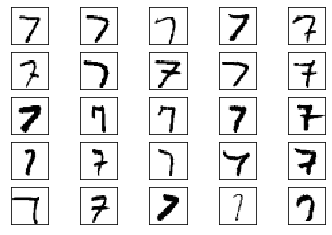

In [5]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(25):
    img = X_test[Y_test == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation = 'nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

## 用感知机进行二分类

### 感知机
输入空间是$\mathcal{X}\in \mathcal{R^n}$,输出空间是$\mathcal{Y} = \left\{+1, -1 \right\}$ 输入空间到输出空间的映射函数为
$$f(x) = sign(w \cdot x + b)$$
### 对奇数和偶数进行分类

In [7]:
Y_train = np.where(Y_train % 2 == 1, 1, -1) # label为奇数就给赋值为+1 为偶数就给赋值为-1
Y_test = np.where(Y_test % 2 == 1, 1, -1)

### 超参数是learning_rate
取learning_rate为0.3 迭代次数为50次

In [8]:
learning_rate = 0.3
epoch = 50

### 对w和b进行初始化
w, b 初始化为全0

In [9]:
w, b = np.zeros((X_train.shape[1], 1)), 0

### 进行训练    

In [14]:
%%time
for k in range(1, epoch + 1):
    flag = 1 #若一次训练
    for i in range(X_train.shape[0]):
        if Y_train[i]*(X_train[i:i+1, :].dot(w) + b) <= 0:
            w = w + learning_rate * Y_train[i] * X_train[i:i+1,:].T
            b = b + learning_rate * Y_train[i]
            flag = 0
    if flag == 1:
        print('nice')
        break
    #打印进度
    if k % 10 == 0:
        print("Iteration %d" % k)

Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Wall time: 27.4 s


In [10]:
correct = 0
for i in range(X_test.shape[0]):
    if Y_test[i] * (X_test[i:i+1,:].dot(w) + b) > 0:
        correct += 1
print("accuracy rate = ", correct / X_test.shape[0])

accuracy rate =  0.8263


In [63]:
print(correct, X_test.shape[0])

8137 10000


### 在learning_rate为0.3的情况下，画出accuracy和iteration次数的图像

In [65]:
x_axis, y_axis = np.zeros(20), np.zeros(20,dtype=np.float32)
for epoch in range(10, 201, 10):
    w, b = np.zeros((X_train.shape[1], 1)), 0
    
    #train
    for k in range(1, epoch + 1):
        flag = 1 #若一次训练
        for i in range(X_train.shape[0]):
            if Y_train[i]*(X_train[i:i+1, :].dot(w) + b) <= 0:
                w = w + learning_rate * Y_train[i] * X_train[i:i+1,:].T
                b = b + learning_rate * Y_train[i]
                flag = 0
        if flag == 1:
            print('nice')
            break
        #打印进度
        if k % 10 == 0:
            print("Iteration %d in epoch %d" % (k, epoch))
            
    #test
    correct = 0
    for i in range(X_test.shape[0]):
        if Y_test[i] * (X_test[i:i+1,:].dot(w) + b) > 0:
            correct += 1
    x_axis[epoch // 10 - 1] = epoch
    y_axis[epoch // 10 - 1] = correct / X_test.shape[0]

Iteration 10 in epoch 10
Iteration 10 in epoch 20
Iteration 20 in epoch 20
Iteration 10 in epoch 30
Iteration 20 in epoch 30
Iteration 30 in epoch 30
Iteration 10 in epoch 40
Iteration 20 in epoch 40
Iteration 30 in epoch 40
Iteration 40 in epoch 40
Iteration 10 in epoch 50
Iteration 20 in epoch 50
Iteration 30 in epoch 50
Iteration 40 in epoch 50
Iteration 50 in epoch 50
Iteration 10 in epoch 60
Iteration 20 in epoch 60
Iteration 30 in epoch 60
Iteration 40 in epoch 60
Iteration 50 in epoch 60
Iteration 60 in epoch 60
Iteration 10 in epoch 70
Iteration 20 in epoch 70
Iteration 30 in epoch 70
Iteration 40 in epoch 70
Iteration 50 in epoch 70
Iteration 60 in epoch 70
Iteration 70 in epoch 70
Iteration 10 in epoch 80
Iteration 20 in epoch 80
Iteration 30 in epoch 80
Iteration 40 in epoch 80
Iteration 50 in epoch 80
Iteration 60 in epoch 80
Iteration 70 in epoch 80
Iteration 80 in epoch 80
Iteration 10 in epoch 90
Iteration 20 in epoch 90
Iteration 30 in epoch 90
Iteration 40 in epoch 90


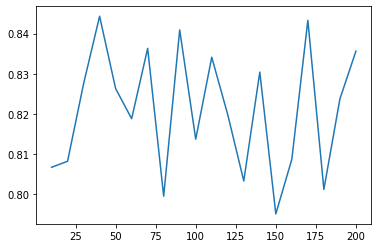

In [66]:
plt.plot(x_axis, y_axis)

In [67]:
print(y_axis)

[0.8067 0.8082 0.8275 0.8443 0.8263 0.8188 0.8363 0.7995 0.8409 0.8137
 0.8341 0.8198 0.8033 0.8304 0.7951 0.8087 0.8433 0.8012 0.8237 0.8356]


### learning_rate 从0.0001 0.0003 0.001 0.003 0.01 0.03 0.1 0.3 下 迭代次数和accuracy rate的关系
其中迭代次数为1--10 然后每10个点一增加，增加到300

In [71]:
learning_rate = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
iterations = [i for i in range(1, 10)] + [i for i in range(10, 301, 10)]

In [77]:
print(iterations)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]


In [73]:
xx, yy = np.zeros((len(learning_rate), len(iterations))), np.zeros((len(learning_rate), len(iterations)))

In [74]:
print(xx.shape)

(8, 39)


In [78]:
for il, lr in enumerate(learning_rate):
    for ie, epoch in enumerate(iterations):
        w, b = np.zeros((X_train.shape[1], 1)), 0

        #train
        for k in range(1, epoch + 1):
            flag = 1 #若一次训练
            for i in range(X_train.shape[0]):
                if Y_train[i]*(X_train[i:i+1, :].dot(w) + b) <= 0:
                    w = w + lr * Y_train[i] * X_train[i:i+1,:].T
                    b = b + lr * Y_train[i]
                    flag = 0
            if flag == 1:
                print('nice')
                break
        #打印进度
        print("Iteration %d learning rate %f complete" % (epoch, lr))

        #test
        correct = 0
        for i in range(X_test.shape[0]):
            if Y_test[i] * (X_test[i:i+1,:].dot(w) + b) > 0:
                correct += 1
        xx[il][ie] = epoch
        yy[il][ie] = correct / X_test.shape[0]

Iteration 1 learning rate 0.000100 complete
Iteration 2 learning rate 0.000100 complete
Iteration 3 learning rate 0.000100 complete
Iteration 4 learning rate 0.000100 complete
Iteration 5 learning rate 0.000100 complete
Iteration 6 learning rate 0.000100 complete
Iteration 7 learning rate 0.000100 complete
Iteration 8 learning rate 0.000100 complete
Iteration 9 learning rate 0.000100 complete
Iteration 10 learning rate 0.000100 complete
Iteration 20 learning rate 0.000100 complete
Iteration 30 learning rate 0.000100 complete
Iteration 40 learning rate 0.000100 complete
Iteration 50 learning rate 0.000100 complete
Iteration 60 learning rate 0.000100 complete
Iteration 70 learning rate 0.000100 complete
Iteration 80 learning rate 0.000100 complete
Iteration 90 learning rate 0.000100 complete
Iteration 100 learning rate 0.000100 complete
Iteration 110 learning rate 0.000100 complete
Iteration 120 learning rate 0.000100 complete
Iteration 130 learning rate 0.000100 complete
Iteration 140 l

Iteration 180 learning rate 0.010000 complete
Iteration 190 learning rate 0.010000 complete
Iteration 200 learning rate 0.010000 complete
Iteration 210 learning rate 0.010000 complete
Iteration 220 learning rate 0.010000 complete
Iteration 230 learning rate 0.010000 complete
Iteration 240 learning rate 0.010000 complete
Iteration 250 learning rate 0.010000 complete
Iteration 260 learning rate 0.010000 complete
Iteration 270 learning rate 0.010000 complete
Iteration 280 learning rate 0.010000 complete
Iteration 290 learning rate 0.010000 complete
Iteration 300 learning rate 0.010000 complete
Iteration 1 learning rate 0.030000 complete
Iteration 2 learning rate 0.030000 complete
Iteration 3 learning rate 0.030000 complete
Iteration 4 learning rate 0.030000 complete
Iteration 5 learning rate 0.030000 complete
Iteration 6 learning rate 0.030000 complete
Iteration 7 learning rate 0.030000 complete
Iteration 8 learning rate 0.030000 complete
Iteration 9 learning rate 0.030000 complete
Iterat

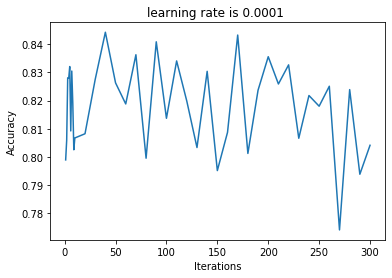

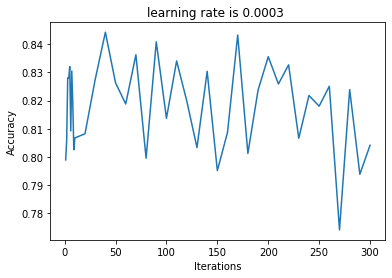

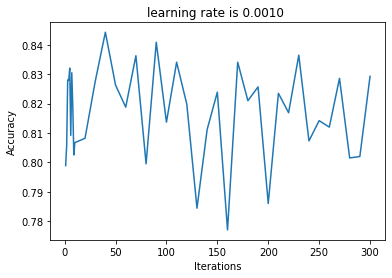

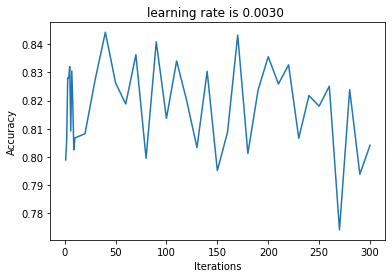

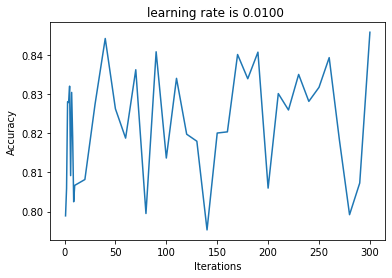

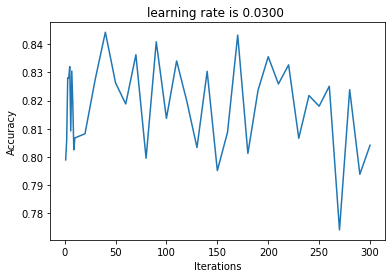

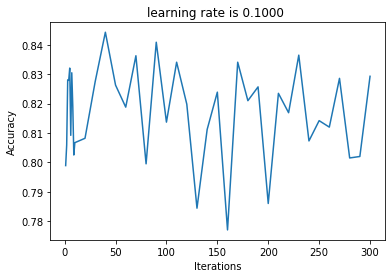

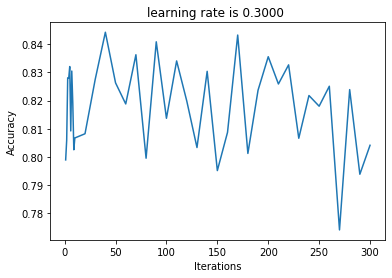

In [86]:
for i in range(len(learning_rate)):
    fig = plt.figure()
    plt.plot(xx[i], yy[i])
    plt.title("learning rate is %.4f " % learning_rate[i])
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.savefig('E:\\%d.jpg' % i)

### 用感知机学习算法的对偶形式
和最开始的learning_rate为0.3 epoch为50来进行比较 我觉得两种算法应该是完全等价的
从头运行到这里 计算gram的时候 报出了Memory Error
重启开始运行这一块的时候 虽然没有报错，但是一直在运行，运行了很久 等不了了就停了，想了一下构造出来的gram矩阵维数
为60000 * 60000，每个元素是uint8，全部存入内存需要3.3G boom

In [ ]:
gram = X_train.dot(X_train.T)
learning_rate = 0.3
epoch = 50
alpha, b = np.zeros((X_train.shape[0], 1)), 0

In [ ]:
%%time
for k in range(1, epoch + 1):
    flag = 1
    for i in range(X_train.shape[0]):
        if X_train[i:i+1, :].dot(alpha * Y_train) + b <= 0:
            alpha[i] += learning_rate
            b     += learning_rate * Y_train[i]
    if flag == 1:
        print('nice')
        break
    #打印进度
    if k % 10 == 0:
        print("Iteration %d" % k)